Learning on fetch_20newsgroups dataset using:
- HashingVectorizer with l1 and l2 norms
- Cross-validation
- linear_model.SGDClassifier with different penalties.

Comparing the results with matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import sklearn.linear_model
import sklearn.model_selection

Load the dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [55]:
mails = data['data'] #list
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

Use `HashingVectorizer` to encode the text into sparse features:

Let's try to use different n_features parameter and to look how our model will alter.
Meanwhile, I am going to compare L1 and L2 regularization by L1 and L2 normalization.

### Default normalization (l2)

In [41]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer1 = HashingVectorizer(n_features=10)
vectorizer2 = HashingVectorizer(n_features=1000)
vectorizer3 = HashingVectorizer(n_features=100000)
vectorizer4 = HashingVectorizer()

X1 = vectorizer1.fit_transform(mails)
X2 = vectorizer2.fit_transform(mails)
X3 = vectorizer3.fit_transform(mails)
X4 = vectorizer4.fit_transform(mails)

y = data['target']

Use the K-Fold cross-validation to split the dataset into training and test parts:

In [42]:
k_folds = sklearn.model_selection.KFold(n_splits=3, shuffle=True, random_state=7)

In [21]:
Xs = [X1, X2, X3, X4]
n_features = [10, 1000, 100000, 'default']
scores_1 = {}
scores_2 = {}


for ind, X in enumerate(Xs):
    scores_l1 = []
    scores_l2 = []

    for train, test in k_folds.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

        model_1 = sklearn.linear_model.SGDClassifier(loss='log', penalty='l1')
        model_1.fit(X_train, y_train)
        scores_l1.append(model_1.score(X_test, y_test))

        model_2 = sklearn.linear_model.SGDClassifier(loss='log', penalty='l2')
        model_2.fit(X_train, y_train)
        scores_l2.append(model_2.score(X_test, y_test))
        

    scores_1[f'n_features: {n_features[ind]}'] = np.mean(scores_l1)
    scores_2[f'n_features: {n_features[ind]}'] = np.mean(scores_l2)


### L1 Normalization

In [25]:
vectorizer1_l1 = HashingVectorizer(norm='l1', n_features=10)
vectorizer2_l1 = HashingVectorizer(norm='l1', n_features=1000)
vectorizer3_l1 = HashingVectorizer(norm='l1', n_features=100000)
vectorizer4_l1 = HashingVectorizer(norm='l1')

X1_l1 = vectorizer1_l1.fit_transform(mails)
X2_l1 = vectorizer2_l1.fit_transform(mails)
X3_l1 = vectorizer3_l1.fit_transform(mails)
X4_l1 = vectorizer4_l1.fit_transform(mails)

y = data['target']

In [26]:
Xs_l1 = [X1_l1, X2_l1, X3_l1, X4_l1]
n_features = [10, 1000, 100000, 'default']
scores_l1_1 = {}
scores_l1_2 = {}


for ind, X in enumerate(Xs_l1):
    scores_l1 = []
    scores_l2 = []

    for train, test in k_folds.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

        model_1 = sklearn.linear_model.SGDClassifier(loss='log', penalty='l1')
        model_1.fit(X_train, y_train)
        scores_l1.append(model_1.score(X_test, y_test))

        model_2 = sklearn.linear_model.SGDClassifier(loss='log', penalty='l2')
        model_2.fit(X_train, y_train)
        scores_l2.append(model_2.score(X_test, y_test))
        

    scores_l1_1[f'n_features: {n_features[ind]}'] = np.mean(scores_l1)
    scores_l1_2[f'n_features: {n_features[ind]}'] = np.mean(scores_l2)

# What model worked best?


Text(0.5, 1.0, 'L2 normalization')

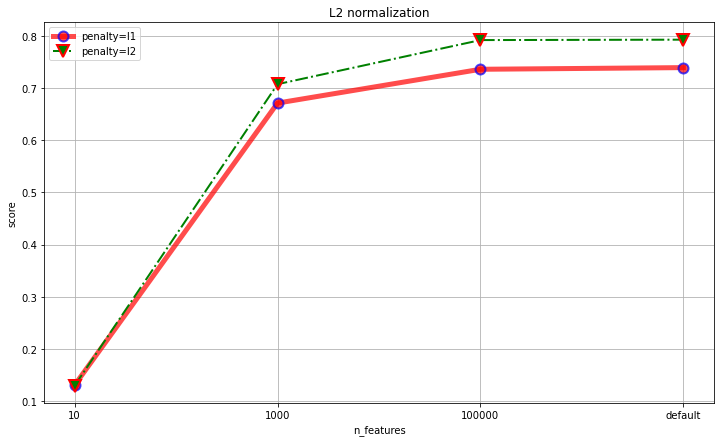

In [34]:
x = n_features

plt.figure(figsize=(12, 7))
plt.plot(x, scores_1.values(), 'o-r', alpha=0.7, label="penalty=l1", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, scores_2.values(), 'v-.g', label="penalty=l2", mec='r', lw=2, mew=2, ms=12)
plt.xlabel('n_features')
plt.ylabel('score')
plt.legend()
plt.grid(True)
plt.title('L2 normalization')

Text(0.5, 1.0, 'L1 normalization')

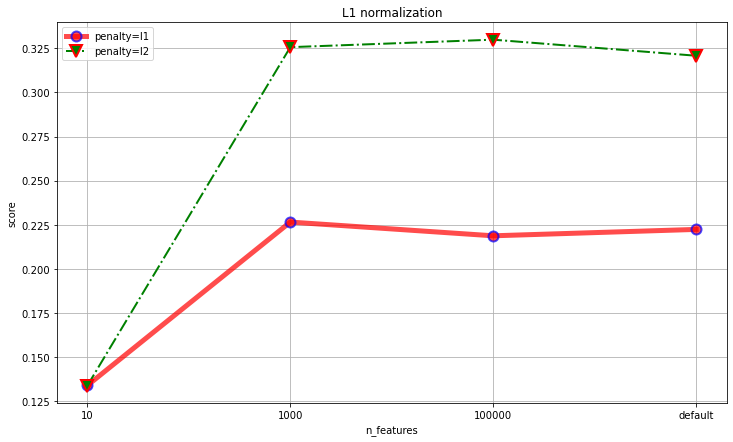

In [32]:
plt.figure(figsize=(12, 7))
plt.plot(x, scores_l1_1.values(), 'o-r', alpha=0.7, label="penalty=l1", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, scores_l1_2.values(), 'v-.g', label="penalty=l2", mec='r', lw=2, mew=2, ms=12)
plt.xlabel('n_features')
plt.ylabel('score')
plt.legend()
plt.grid(True)
plt.title('L1 normalization')

## Conclude:

### norm='l2' + penalty='l2'  gives  the best score (0.8) which exceed the worst score (0.225) (norm=l1 & penalty=l1) by more than 3.5 times.

Talking about "n_features" we can see an extremely tiny score in both graphs by n_featues=10.

There is a significant score increase by n_features=1000 in both graphs. However, on the "L1 normalization" graph by penalty=l1, the score decreases a bit while n_features grows. Same is for penalty='l2', but it starts decline after n_features=100000.

The "L2 normalization" graph follows the opposite trend.

|

|

|

|

I decided to observe penalty='elasticnet' separately because its results are not "new": they repeat L2 and L1 results.

## *Elasticnet

In [47]:
elastic_scores_l1 = {}
elastic_scores_l2 = {}
for ind, X in enumerate(Xs_l1):
    scores_l1 = []

    for train, test in k_folds.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

        model = sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet')
        model.fit(X_train, y_train)
        scores_l1.append(model.score(X_test, y_test))

    elastic_scores_l1[f'n_features: {n_features[ind]}'] = np.mean(scores_l1)
    
for ind, X in enumerate(Xs):
    scores_l2 = []
    for train, test in k_folds.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        
        model = sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet')
        model.fit(X_train, y_train)
        scores_l2.append(model.score(X_test, y_test))
        
    elastic_scores_l2[f'n_features: {n_features[ind]}'] = np.mean(scores_l2)

Text(0.5, 1.0, '*Elasticnet')

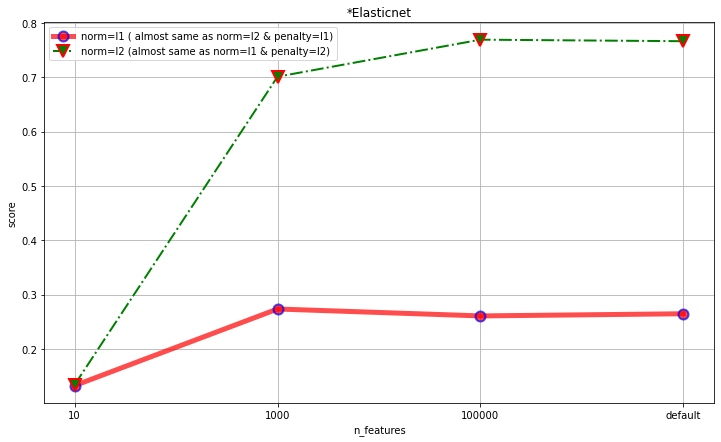

In [54]:
x = n_features

plt.figure(figsize=(12, 7))
plt.plot(x, elastic_scores_l1.values(), 'o-r', alpha=0.7, label="norm=l1 ( almost same as norm=l2 & penalty=l1)", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, elastic_scores_l2.values(), 'v-.g', label="norm=l2 (almost same as norm=l1 & penalty=l2)", mec='r', lw=2, mew=2, ms=12)
plt.xlabel('n_features')
plt.ylabel('score')
plt.legend()
plt.grid(True)
plt.title('*Elasticnet')